Importation des library

In [17]:
import pandas as pd
import numpy as np
import vectorbt as vbt
import matplotlib.pyplot as plt
import anywidget
import os
from pathlib import Path

plt.style.use('dark_background')

Chargement des données

In [ ]:
symbol = ['BTCUSDT']
time = "4h"
chemin = r'C:\Users\gunsa\Desktop\Git-Repo\Bot-Trading\Data\3m\BTCUSDT\BTCUSDT_14d_2025-12-08_TO_2025-12-22_3m_data'
data = pd.read_parquet(chemin)

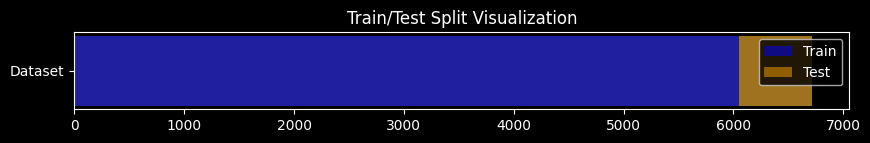

In [19]:
# Separation des données en train et test (IS/OOS) (70/30%)
split_idx = int(0.9*len(data))
train_data = data.iloc[:split_idx]
test_data = data.iloc[split_idx:]

# Affichage de la séparation des données
plt.figure(figsize=(10, 1))
plt.barh(['Dataset'], [len(data)], color='lightgray', alpha=0.3)
plt.barh(['Dataset'], [split_idx], color='blue', alpha=0.5, label='Train')
plt.barh(['Dataset'], [len(data)-split_idx], left=split_idx, color='orange', alpha=0.5, label='Test')
plt.title('Train/Test Split Visualization')
plt.legend()
plt.show()

In [20]:
data

,Open,High,Low,Close,Volume,Close time,Quote volume,Number of trades,Taker base volume,Taker quote volume
Open time,,,,,,,,,,
2025-12-08 00:00:00+01:00,89597.03,89774.56,89550.01,89708.43,33.00972,2025-12-07 23:02:59.999000+00:00,2.959914e+06,17962,17.54735,1.573103e+06
2025-12-08 00:03:00+01:00,89708.40,89828.19,89592.01,89609.36,53.19656,2025-12-07 23:05:59.999000+00:00,4.774117e+06,13841,36.15682,3.244941e+06
2025-12-08 00:06:00+01:00,89609.36,89699.39,89522.08,89626.01,16.28238,2025-12-07 23:08:59.999000+00:00,1.458718e+06,12229,6.88708,6.170726e+05
2025-12-08 00:09:00+01:00,89626.01,89719.66,89530.17,89656.28,19.05092,2025-12-07 23:11:59.999000+00:00,1.707853e+06,14170,11.83441,1.060929e+06
2025-12-08 00:12:00+01:00,89656.29,89757.01,89656.29,89730.42,11.57025,2025-12-07 23:14:59.999000+00:00,1.038010e+06,7821,8.03213,7.206145e+05
...,...,...,...,...,...,...,...,...,...,...
2025-12-21 23:45:00+01:00,88378.27,88436.00,88378.26,88401.05,7.23254,2025-12-21 22:47:59.999000+00:00,6.394390e+05,4649,3.67749,3.250759e+05
2025-12-21 23:48:00+01:00,88401.05,88423.28,88368.71,88423.28,4.61406,2025-12-21 22:50:59.999000+00:00,4.078385e+05,3752,2.05879,1.819630e+05
2025-12-21 23:51:00+01:00,88423.28,88460.96,88423.27,88455.57,16.17512,2025-12-21 22:53:59.999000+00:00,1.430720e+06,2873,6.37422,5.637591e+05


In [29]:
import pandas as pd
import numpy as np
import vectorbt as vbt


df = data.copy()

close = df['Close']

# =============================
# PARAMETERS (PINE EXACT)
# =============================
RSI_LENGTH = 6
RSI_OVERSOLD = 50
RSI_OVERBOUGHT = 50

BB_LENGTH = 200
BB_MULT = 2

# =============================
# INDICATORS
# =============================

# RSI
rsi = vbt.RSI.run(close, window=RSI_LENGTH).rsi

# Bollinger Bands
bb = vbt.BBANDS.run(
    close,
    window=BB_LENGTH,
    alpha=BB_MULT
)

bb_upper = bb.upper
bb_lower = bb.lower

# =============================
# CROSSOVER FUNCTIONS
# =============================
def crossover(series, level):
    return (series > level) & (series.shift(1) <= level)

def crossunder(series, level):
    return (series < level) & (series.shift(1) >= level)


# =============================
# ENTRY SIGNALS (STRICT PINE)
# =============================

long_entries = (
    crossover(rsi, RSI_OVERSOLD) &
    crossover(close, bb_lower)
)

short_entries = (
    crossunder(rsi, RSI_OVERBOUGHT) &
    crossunder(close, bb_upper)
)

# =============================
# PORTFOLIO
# =============================

portfolio = vbt.Portfolio.from_signals(
    close=close,
    entries=long_entries,
    exits=short_entries,
    short_entries=short_entries,
    short_exits=long_entries,
    init_cash=400,
    size=0.8,                  # 80% du capital par trade
    size_type="value",
    cash_sharing=False,        # 1 trade à la fois
    freq='3m',
    fees=0.001,  # Frais de trading 0.1%
    slippage=0.001  # Slippage 0.1%
)

# =============================
# RESULTS
# =============================
print(portfolio.stats())

portfolio.plot().show()


Start                         2025-12-08 00:00:00+01:00
End                           2025-12-21 23:57:00+01:00
Period                                 14 days 00:00:00
Start Value                                       400.0
End Value                                    399.980151
Total Return [%]                              -0.004962
Benchmark Return [%]                          -1.365312
Max Gross Exposure [%]                         0.206696
Total Fees Paid                                0.018375
Max Drawdown [%]                               0.017721
Max Drawdown Duration                  12 days 05:54:00
Total Trades                                         12
Total Closed Trades                                  11
Total Open Trades                                     1
Open Trade PnL                                 0.001071
Win Rate [%]                                  36.363636
Best Trade [%]                                 0.986055
Worst Trade [%]                               -1

In [30]:
trades = portfolio.trades.records_readable

print("===== EMA 9/21 + ATR TP/SL (Long & Short) =====")

print(portfolio.stats())

def stats_by_direction(trades, direction_name):
    t = trades[trades['Direction'] == direction_name]
    wins = t[t['PnL'] > 0]
    
    return {
        "direction": direction_name,
        "trades": len(t),
        "wins": len(wins),
        "losses": len(t) - len(wins),
        "winrate_%": round(len(wins) / len(t) * 100, 2) if len(t) > 0 else 0,
        "total_pnl": round(t['PnL'].sum(), 2),
        "avg_pnl": round(t['PnL'].mean(), 2)
    }

long_stats  = stats_by_direction(trades, "Long")
short_stats = stats_by_direction(trades, "Short")

print(long_stats)
print(short_stats)

===== EMA 9/21 + ATR TP/SL (Long & Short) =====
Start                         2025-12-08 00:00:00+01:00
End                           2025-12-21 23:57:00+01:00
Period                                 14 days 00:00:00
Start Value                                       400.0
End Value                                    399.980151
Total Return [%]                              -0.004962
Benchmark Return [%]                          -1.365312
Max Gross Exposure [%]                         0.206696
Total Fees Paid                                0.018375
Max Drawdown [%]                               0.017721
Max Drawdown Duration                  12 days 05:54:00
Total Trades                                         12
Total Closed Trades                                  11
Total Open Trades                                     1
Open Trade PnL                                 0.001071
Win Rate [%]                                  36.363636
Best Trade [%]                                 0.986055
